In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 22 11:13:14 2018

@author: lequang
"""
from __future__ import division

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



def infection_model(network, p, flights, start_node):

    #Extract data of first flight and last flight 
    

    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection


flights = pd.read_csv("./events_US_air_traffic_GMT.txt", sep = " ")

#Read in network data
networkpath = "./aggregated_US_air_traffic_network_undir.edg"
network = nx.read_weighted_edgelist(networkpath, nodetype = int )

#Run model with p = 1
start_node_0 = flights.Source[0] #Initiate the first infected node
flights = flights.sort_values("StartTime")
start_time = flights.StartTime.min() #First infected time
end_time = flights.EndTime.max()


#infection = infection_model(network, 1 ,flights, start_node_0)
#infection_times = infection.InfectionTime

#print("Anchorage infection time: ",infection.InfectionTime[41])


In [3]:
n_repeat = 50
n = len(network)
time = np.zeros((len(network),n_repeat), dtype=float)
for i in range(n_repeat):
    start_node = np.random.randint(0,n) 
    infection_i = infection_model(network, 0.5 ,flights, start_node)
    time[:,i] = infection_i.InfectionTime
time_median = np.average(time,axis = 1)
print(time_median)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[1.22933108e+09 1.22930937e+09 1.22930244e+09 1.22929852e+09
 1.22928354e+09 1.22930294e+09 1.22935684e+09 1.22929286e+09
 1.22930569e+09 1.22933872e+09 1.22930650e+09 1.22930770e+09
 1.22929737e+09 1.22931605e+09 1.22931154e+09 1.22930271e+09
 1.22930475e+09 1.22933982e+09 1.22934198e+09 1.22930723e+09
 1.22930900e+09 1.22930642e+09 1.22930996e+09 1.22931053e+09
 1.22930268e+09 1.22930835e+09 1.22930958e+09 1.22930314e+09
 1.22930610e+09 1.22931074e+09 1.22931408e+09 1.22929749e+09
 1.22930674e+09 1.22930605e+09 1.22930208e+09 1.22938807e+09
 1.22936760e+09 1.22932429e+09 1.22930824e+09 1.22935183e+09
            inf 1.22933108e+09 1.22941302e+09 1.22935541e+09
 1.22935808e+09 1.22932166e+09 1.22931306e+09 1.22930657e+09
 1.22930357e+09 1.22930616e+09 1.22930561e+09 1.22936101e+09
 1.22941609e+09 1.22938120e+09 1.22948075e+09 1.22933511e+09
 1.22934217e+09 1.22941614e+09 1.22941599e+09 1.22943754e+09
 1.22934664e+09 1.22932595e+09 1.22931922e+09 1.22931133e+09
 1.22931014e+09 1.229309

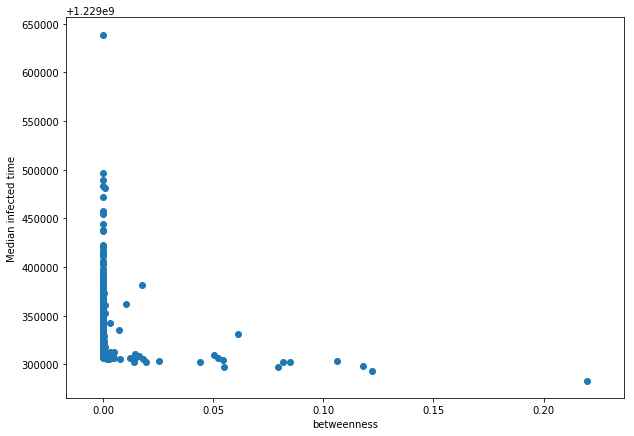

Spearman coef betweenness : SpearmanrResult(correlation=-0.6974532666608194, pvalue=5.6483374983657015e-42)


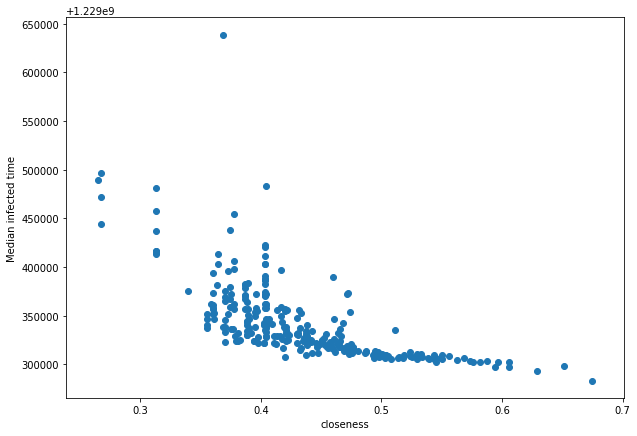

Spearman coef closeness : SpearmanrResult(correlation=-0.8225860336908187, pvalue=7.153036370357572e-70)


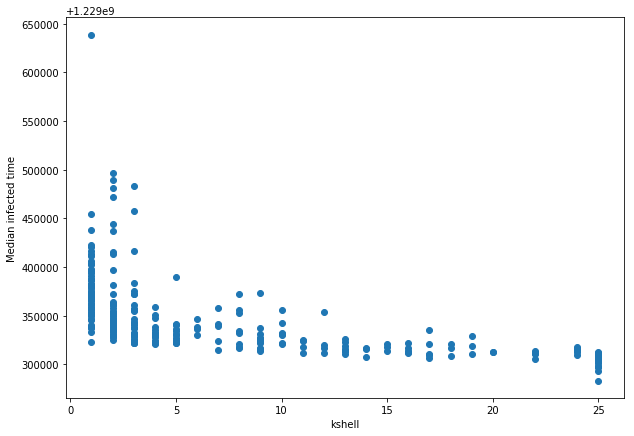

Spearman coef kshell : SpearmanrResult(correlation=-0.8600188505424706, pvalue=6.3685385265985424e-83)


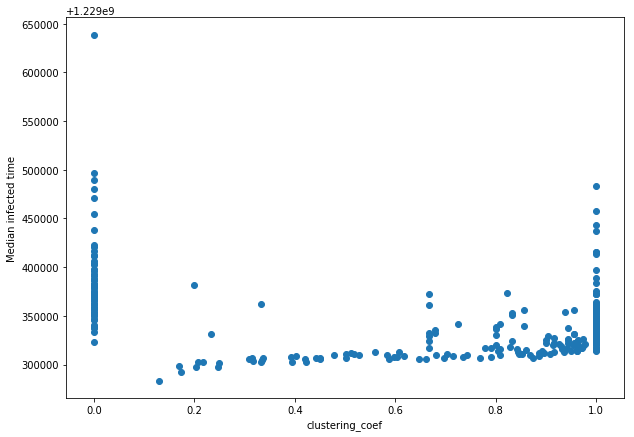

Spearman coef clustering_coef : SpearmanrResult(correlation=-0.11262466724272435, pvalue=0.06028018287656787)


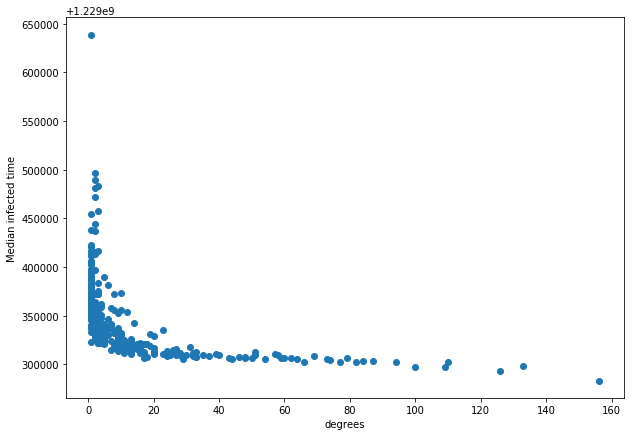

Spearman coef degrees : SpearmanrResult(correlation=-0.8565663568861137, pvalue=1.4439514014539262e-81)


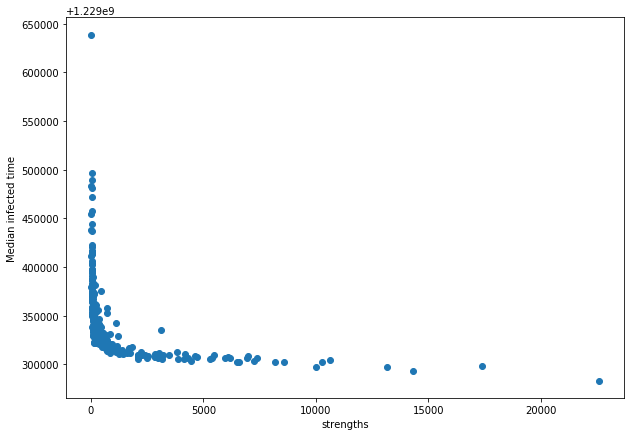

Spearman coef strengths : SpearmanrResult(correlation=-0.9223464362266645, pvalue=2.056736503962475e-116)


In [7]:
#Task 4 cont
from scipy import stats

betweenness = nx.betweenness_centrality(network)
closeness = nx.closeness_centrality(network)
kshell = nx.core_number(network)
clustering_coef = nx.clustering(network)   
degrees = nx.degree(network)
strengths = nx.degree(network, weight = "weight")

betweeness_vec = []
closeness_vec = []
kshell_vec = []
clustering_coef_vec = []
degree_vec = []
strength_vec = []
timemedian_vec = []
for node in network.nodes():
    betweeness_vec.append(betweenness[node])
    closeness_vec.append(closeness[node])
    kshell_vec.append(kshell[node])
    clustering_coef_vec.append(clustering_coef[node])
    degree_vec.append(degrees[node])
    strength_vec.append(strengths[node])
    timemedian_vec.append(time_median[node])

                   
y_values = [betweeness_vec, closeness_vec, kshell_vec, clustering_coef_vec, degree_vec, strength_vec]
y_labels = ["betweenness", "closeness", "kshell", "clustering_coef", "degrees", "strengths"]


for y_val, label in zip(y_values, y_labels):
    fig = plt.figure(figsize=(10,7))
    plt.scatter(y_val, timemedian_vec)
    plt.xlabel(label)
    plt.ylabel("Median infected time")
    plt.show()
    spearman = stats.spearmanr(y_val, timemedian_vec)
    print("Spearman coef " + label + " :", spearman)


In [8]:
print("betweenness: ", betweenness)


betweenness:  {0: 0.0, 1: 0.004675368483266848, 2: 0.014124523341258495, 3: 0.11820322297203643, 4: 0.2196289180541113, 5: 0.08488858216516484, 134: 1.740826092175338e-06, 135: 1.0854873127934035e-05, 10: 0.004918172252492342, 12: 0.07959904368552326, 15: 0.019244832755712225, 16: 0.05433151305478008, 146: 3.3743469501118108e-06, 19: 0.0007134654009886451, 20: 0.016370828024802185, 21: 0.003877882719976026, 24: 0.043761707709995636, 26: 0.050470429688131625, 27: 0.10614303584254271, 28: 0.0015891482366721626, 29: 0.004347161765893404, 31: 0.054729214229390685, 32: 0.0519686885260254, 33: 0.0078108397336235594, 34: 0.08160052972599657, 7: 0.12230957669901915, 45: 9.600331331925729e-06, 46: 0.004970351872555297, 47: 0.014497029745119981, 48: 0.025161003589315865, 49: 0.012241724529594497, 50: 0.0027743535975730655, 62: 1.2699488246244191e-06, 68: 1.2699488246244191e-06, 70: 1.848640921615987e-05, 71: 0.003167520679946567, 72: 0.0010316814165138477, 77: 0.00011278081925118401, 78: 0.00099